In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
 %matplotlib inline
import pandas as pd
import scipy.stats as stats

In [6]:
df = pd.read_csv("reviewdata.csv")
df.head()

,Unnamed: 0,id,product_id,author_id,review_url,title,text,input_date,input_time,stars,vine,verified,tPolarity,tSubjectivity,vNegative,vPositive,vNeutral,vCompound
0,0,7778,B071GKQVN2,CJS,https://www.amazon.com/review/R207H7ZJMQKYOD/r...,Mountain Falls Baby Shampoo,"We use baby shampoo intermittently, as I have ...",NaN,2017-10-18 21:19:00,5,True,False,0.225641,0.378846,0.000,0.115,0.885,0.9025
1,1,7797,B072KD9TCZ,Bobby Jo,https://www.amazon.com/review/R2S5Y1OR2HR3FI/r...,It really works,This works fantastic. It is comparable to Hea...,NaN,2017-10-18 22:53:00,5,True,False,0.326000,0.760000,0.188,0.142,0.670,-0.5330
2,2,12,B076WSGT91,Mike,https://www.amazon.com/review/R3R0HHJAVACYCM/r...,Multiple Cans in One Box,I liked how it came as multiple cans in one box.,NaN,2019-03-27 00:49:00,5,False,False,0.300000,0.400000,0.000,0.237,0.763,0.4215
3,3,13,B076WSGT91,Heather,https://www.amazon.com/review/R3MA03KZJ9SRYC/r...,... didn't work but they did replace all - ver...,One of the cans didn't work but they did repla...,NaN,2018-09-29 04:11:00,4,False,True,0.780000,1.000000,0.000,0.216,0.784,0.6297
4,4,15,B076WSGT91,Amazon Customer,https://www.amazon.com/review/RBUBFJYUO7QD1/re...,Poor design.,The twist top to unlock the spray does not unl...,NaN,2018-07-12 18:18:00,1,False,True,0.363889,0.394444,0.046,0.130,0.824,0.4145


In [7]:
group1 = df[df["stars"] == 1]["vCompound"]
group2 = df[df["stars"] == 2]["vCompound"]
group3 = df[df["stars"] == 3]["vCompound"]
group4 = df[df["stars"] == 4]["vCompound"]
group5 = df[df["stars"] == 5]["vCompound"]

In [8]:
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=1110.3853669582318, pvalue=0.0)

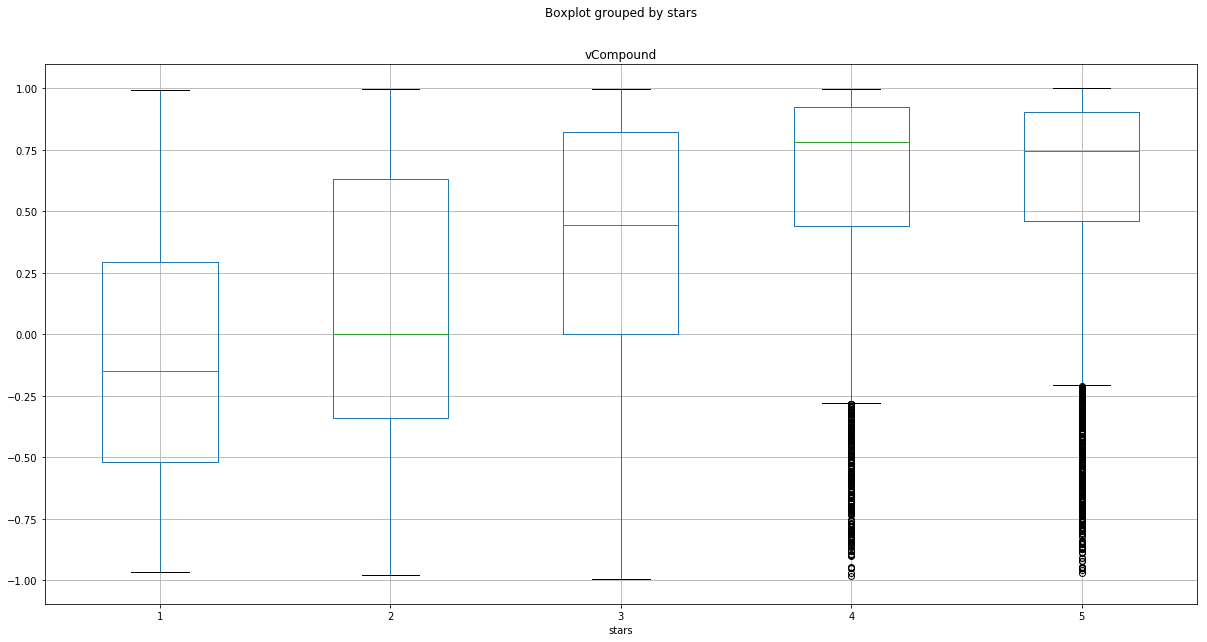

In [9]:
df.boxplot("vCompound", by="stars", figsize=(20, 10))

In [10]:
group1 = df[df["stars"] == 1]["tPolarity"]
group2 = df[df["stars"] == 2]["tPolarity"]
group3 = df[df["stars"] == 3]["tPolarity"]
group4 = df[df["stars"] == 4]["tPolarity"]
group5 = df[df["stars"] == 5]["tPolarity"]

In [11]:
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=795.9278076471592, pvalue=0.0)

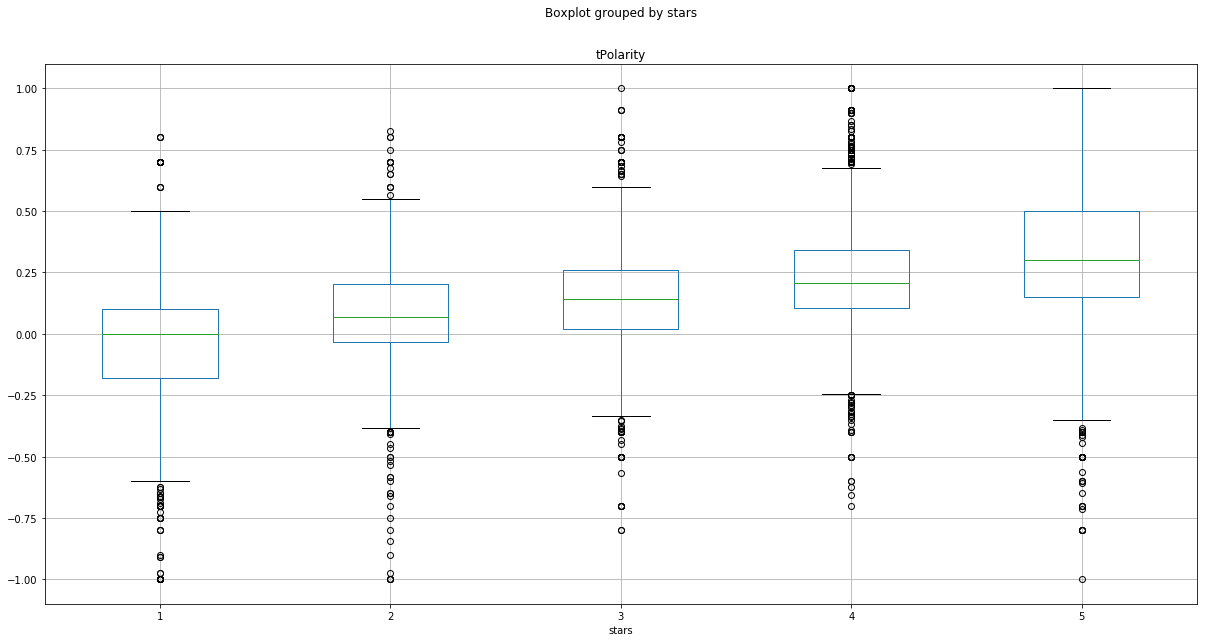

In [12]:
df.boxplot("tPolarity", by="stars", figsize=(20, 10))

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [16]:
results = ols('vCompound ~ C(stars)', data=df).fit()

In [24]:
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:              vCompound   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     1110.
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:06:15   Log-Likelihood:                -10064.
No. Observations:               20394   AIC:                         2.014e+04
Df Residuals:                   20389   BIC:                         2.018e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1105      0.013     -8.297

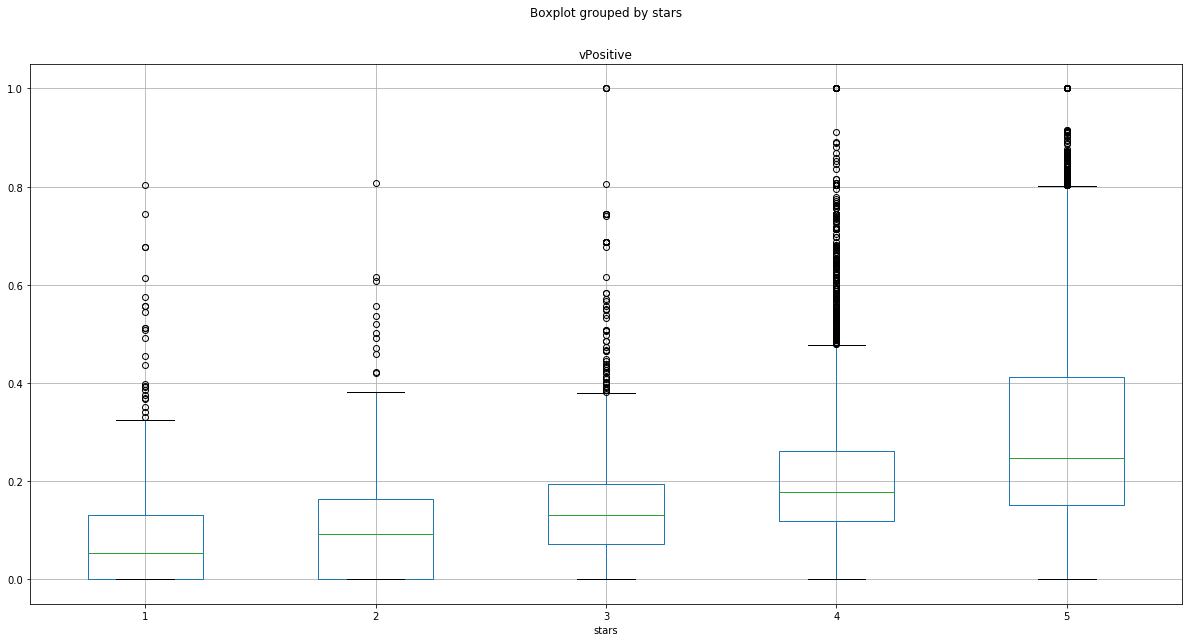

In [25]:
df.boxplot("vPositive", by="stars", figsize=(20, 10))

In [28]:
group1 = df[df["stars"] == 1]["vNeutral"]
group2 = df[df["stars"] == 2]["vNeutral"]
group3 = df[df["stars"] == 3]["vNeutral"]
group4 = df[df["stars"] == 4]["vNeutral"]
group5 = df[df["stars"] == 5]["vNeutral"]

In [29]:
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=288.49663597716824, pvalue=9.72120890941004e-242)

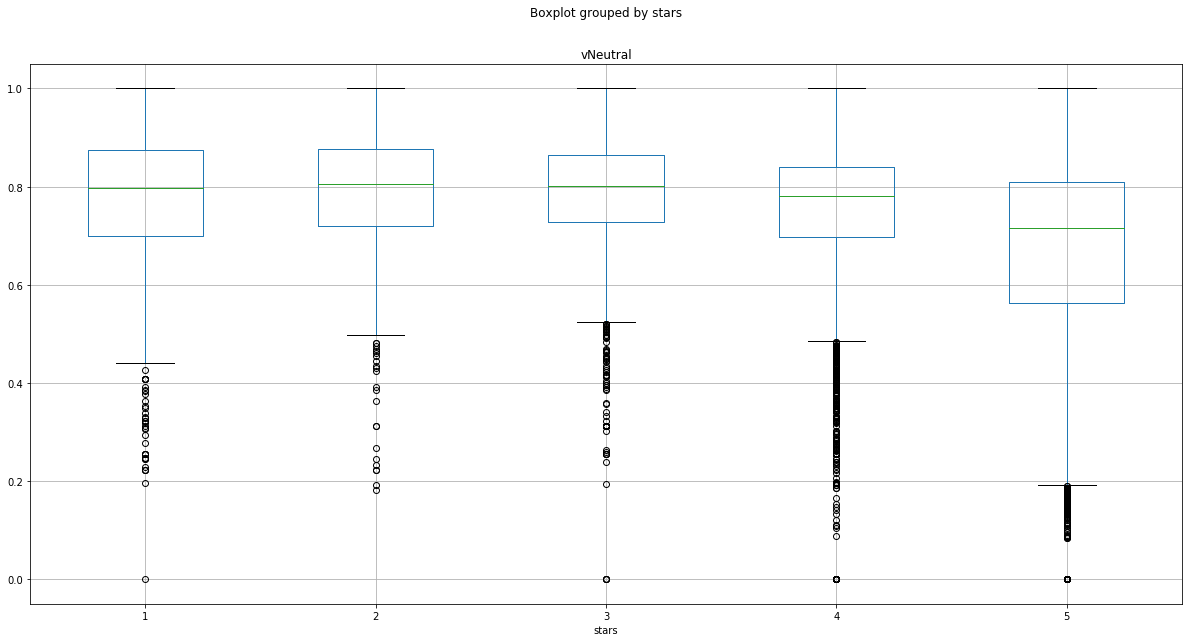

In [30]:
df.boxplot("vNeutral", by="stars", figsize=(20, 10))

In [32]:
import scipy.stats

In [33]:
scipy.stats.chisquare(df["vine"].value_counts())

Power_divergenceResult(statistic=338.6478375992939, pvalue=1.2570403387052875e-75)

In [36]:
contingency_table = pd.crosstab(
    df['vine'],
    df['stars'],
    margins = True
)
contingency_table

stars,1,2,3,4,5,All
vine,,,,,,
False,821,496,731,1405,8058,11511
True,65,194,747,2975,4902,8883
All,886,690,1478,4380,12960,20394


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import pandas as pd
%matplotlib inline

In [65]:
f_obs = np.append(contingency_table.iloc[0][0:5].values, contingency_table.iloc[1][0:5].values)
f_obs

array([ 821,  496,  731, 1405, 8058,   65,  194,  747, 2975, 4902],
      dtype=int64)

In [68]:
row_sums = contingency_table.iloc[0:2,5].values
row_sums

array([11511,  8883], dtype=int64)

In [69]:
col_sums = contingency_table.iloc[2,0:5].values
col_sums

array([  886,   690,  1478,  4380, 12960], dtype=int64)

In [70]:
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
f_expected

[500.0856134157105,
 389.4571932921447,
 834.2285966460723,
 2472.206531332745,
 7315.022065313327,
 385.9143865842895,
 300.5428067078553,
 643.7714033539277,
 1907.7934686672552,
 5644.977934686673]

In [71]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 1799.975651466807


In [72]:
dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

Degrees of Freedom: 4


In [75]:
f_obs = np.array([contingency_table.iloc[0][0:6].values,
                  contingency_table.iloc[1][0:6].values])
f_obs

array([[  821,   496,   731,  1405,  8058, 11511],
       [   65,   194,   747,  2975,  4902,  8883]], dtype=int64)

In [76]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(1799.975651466807, 0.0, 5)

In [108]:
df.groupby("stars")['vCompound'].describe()

,count,mean,std,min,25%,50%,75%,max
stars,,,,,,,,
1,886.0,-0.110492,0.498482,-0.9674,-0.51975,-0.15120,0.292525,0.9927
2,690.0,0.101284,0.557865,-0.9804,-0.34120,0.00000,0.632425,0.9957
3,1478.0,0.345756,0.522187,-0.9964,0.00000,0.44215,0.822600,0.9966
4,4380.0,0.626135,0.404654,-0.9847,0.44040,0.78275,0.921425,0.9971
5,12960.0,0.632127,0.356793,-0.9719,0.45880,0.74300,0.902200,0.9991


In [109]:
vine = df['stars'] == '5'

TypeError: invalid type comparison

In [105]:
print(type(vine)) 

<class 'pandas.core.series.Series'>


In [95]:
vine.head()

0     True
1     True
2    False
3    False
4    False
Name: vine, dtype: bool

In [86]:
rp.summary_cont(df.groupby("vine")['vCompound'])

NameError: name 'rp' is not defined